# Google Stock 2020-2025

This project will attempt to analyze, visualize, calculate, and create a time series model for predicting. Note that this project aims to learn stock market analysis, financial data visualization, and time series modelling, hence I am not recommend anyone to follow this.

I'm just doing this for sole purpose of learning.

🧰 **Key Features** (from the dataset provider):
- **Date**: The trading day in YYYY-MM-DD format
- **Open**: Price at market open
- **High**: Highest price during the trading session
- **Low**: Lowest price during the trading session
- **Close**: Price at market close
- **Adj Close**: Adjusted closing price accounting for dividends and stock splits
- **Volume**: Number of shares traded

In [35]:
# Data handling
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()
import statsmodels.api as sm
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
# Preprocessing

import warnings
warnings.filterwarnings('ignore')

In [36]:
data = pd.read_csv('google_5yr_one.csv', skiprows=[1], parse_dates=['Date'])
df = data.copy()
df.head()

,Date,Close,High,Low,Open,Volume
0,2020-06-04,70.378517,71.723094,69.965992,71.497169,26982000
1,2020-06-05,71.658401,71.970910,70.046107,70.445200,42642000
2,2020-06-08,72.057487,72.105256,70.885091,70.974667,33878000
3,2020-06-09,72.258530,73.040793,71.774842,71.918162,33624000
4,2020-06-10,72.886528,73.288104,72.371990,72.727787,31762000


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255 entries, 0 to 1254
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1255 non-null   datetime64[ns]
 1   Close   1255 non-null   float64       
 2   High    1255 non-null   float64       
 3   Low     1255 non-null   float64       
 4   Open    1255 non-null   float64       
 5   Volume  1255 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 59.0 KB


In [38]:
df.set_index('Date', inplace=True)

In [39]:
df.sort_index(inplace=True)

In [40]:
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2020-06-04,70.378517,71.723094,69.965992,71.497169,26982000
2020-06-05,71.658401,71.970910,70.046107,70.445200,42642000
2020-06-08,72.057487,72.105256,70.885091,70.974667,33878000
2020-06-09,72.258530,73.040793,71.774842,71.918162,33624000
2020-06-10,72.886528,73.288104,72.371990,72.727787,31762000


In [41]:
df["Close"] = df["Close"].replace(',', '', regex=True)
df["Close"] = pd.to_numeric(df["Close"], errors='coerce')
df["Close"].replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(subset=["Close"], inplace=True)

df['return'] = df['Close'].pct_change()
df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA100'] = df['Close'].rolling(window=100).mean()

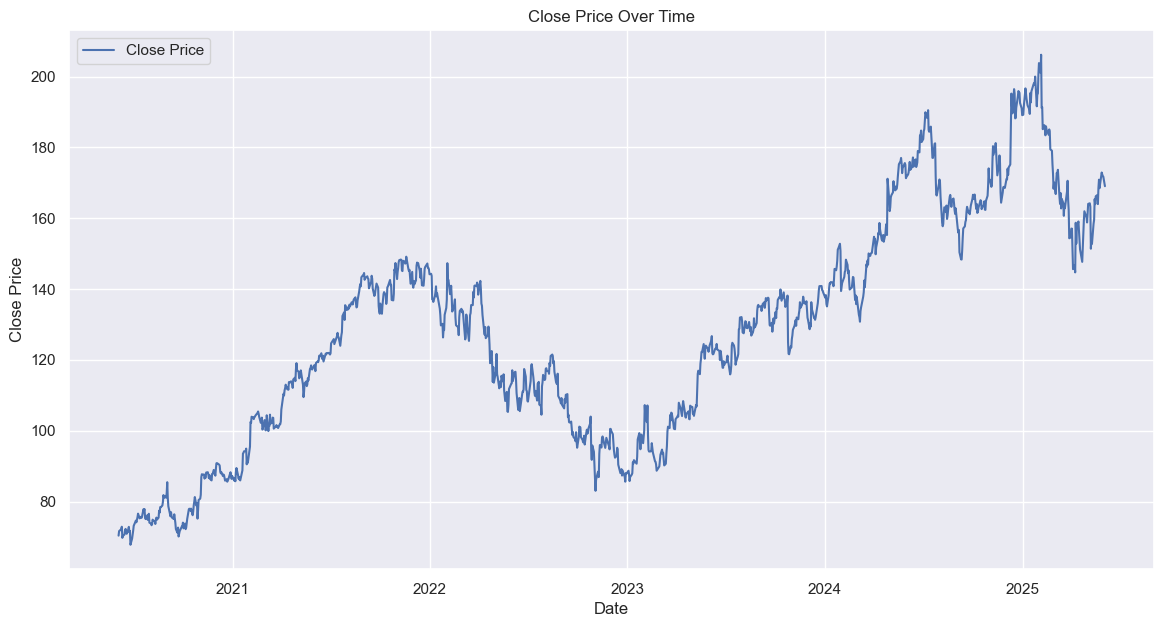

In [42]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df["Close"], label='Close Price')
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()